In [1]:
# libraries installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Data loading

In [3]:
# Load csv file in pandas DataFrame
df = pd.read_csv('kc_house_data.csv')

# View few samples
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Cleaning

In [7]:
# drop unwanted columns
df.drop(['id','date','zipcode','yr_built','yr_renovated','lat','long'],axis=1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


In [11]:
# Check Nan Value Present
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
# check Duplicates Value Present
df.duplicated().sum()

# drop duplicated records
df.drop_duplicates(inplace=True)

# EDA

In [16]:
# summary statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.160600e+04,21606.000000,21606.000000,21606.000000,2.160600e+04,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000,21606.000000
mean,5.401023e+05,3.370869,2.114679,2079.947839,1.511082e+04,1.494076,0.007544,0.234240,3.409516,7.656623,1788.394335,291.553504,1986.577756,12771.097936
std,3.671789e+05,0.930076,0.770246,918.547546,4.142664e+04,0.539881,0.086531,0.766201,0.650800,1.175533,828.175310,442.628193,685.448915,27308.076286
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.216125e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


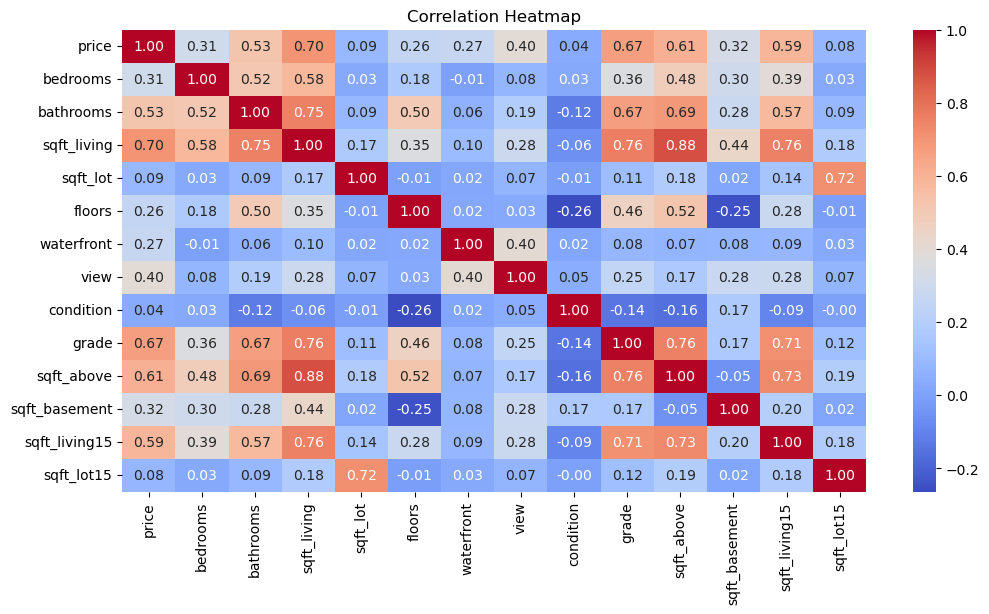

In [18]:
# correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [50]:
# Count the number of houses with unique floor values
floor_counts = df['floors'].value_counts().to_frame()

# Display the result
print(floor_counts)

        count
floors       
1.0      8522
2.0      5554
1.5      1506
3.0       550
2.5        80
3.5         6


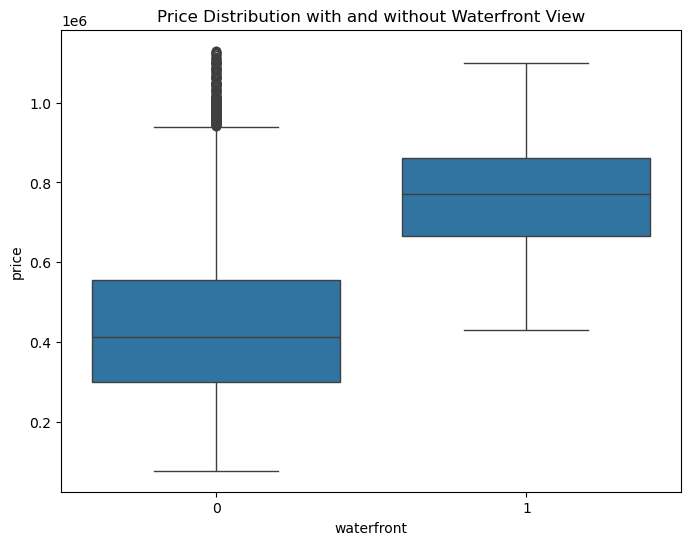

In [54]:
# Create a boxplot to analyze waterfront vs. price outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)

# Show the plot
plt.title('Price Distribution with and without Waterfront View')
plt.show()

In [20]:
# find columns names
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

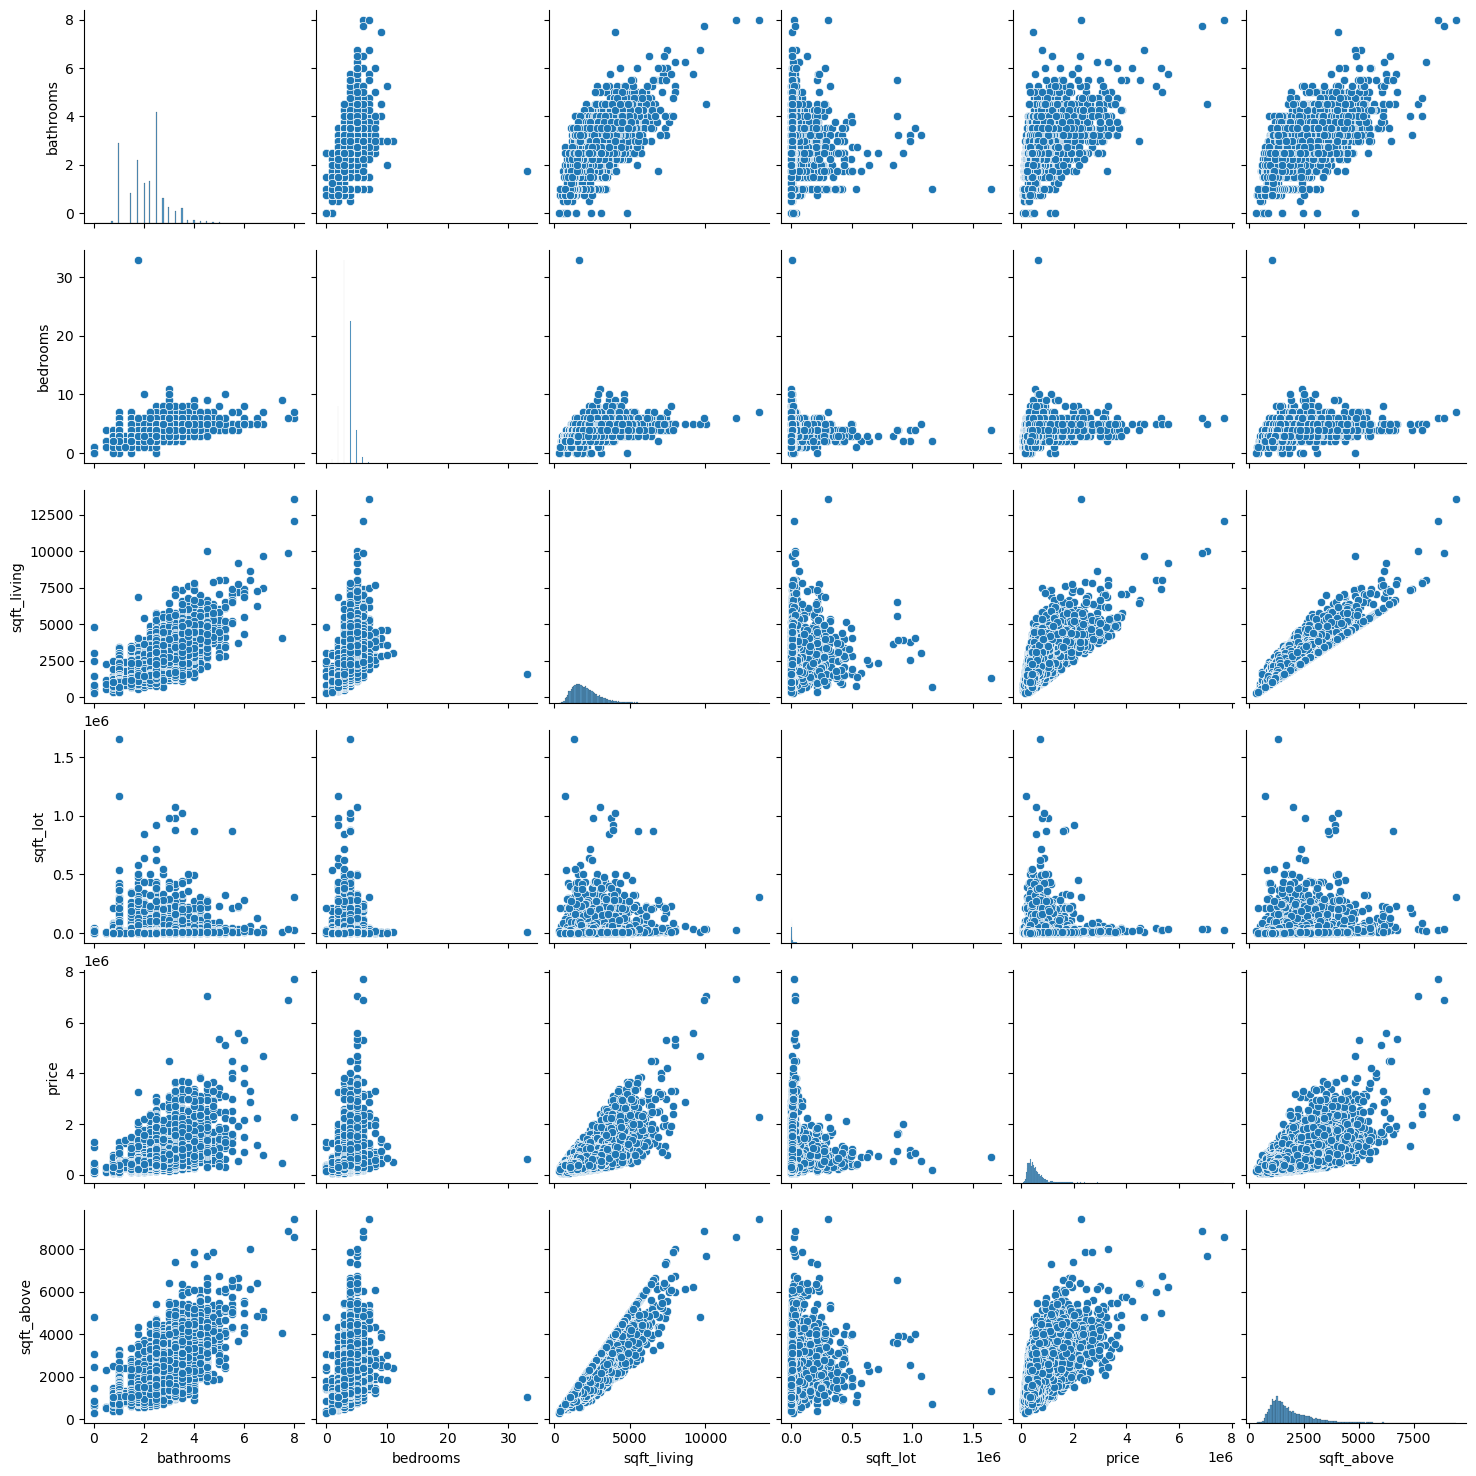

In [22]:
# Pair plot for a few variables
sns.pairplot(df[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'price','sqft_above']])
plt.show()

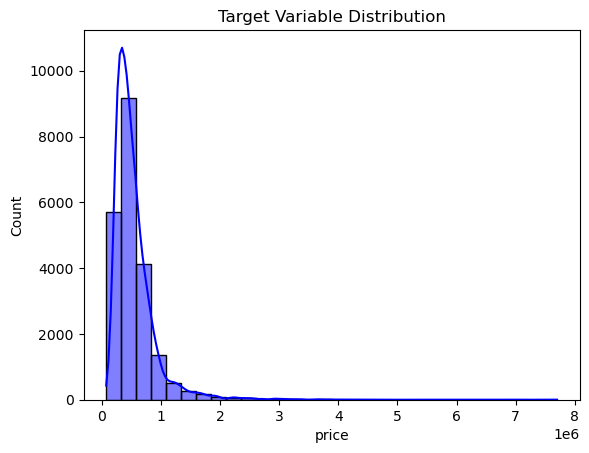

In [24]:
# Target distribution
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title("Target Variable Distribution")
plt.show()

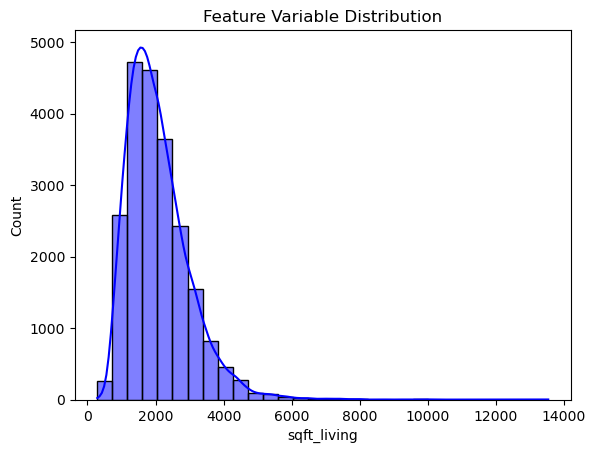

In [26]:
# Target distribution
sns.histplot(df['sqft_living'], kde=True, bins=30, color='blue')
plt.title("Feature Variable Distribution")
plt.show()

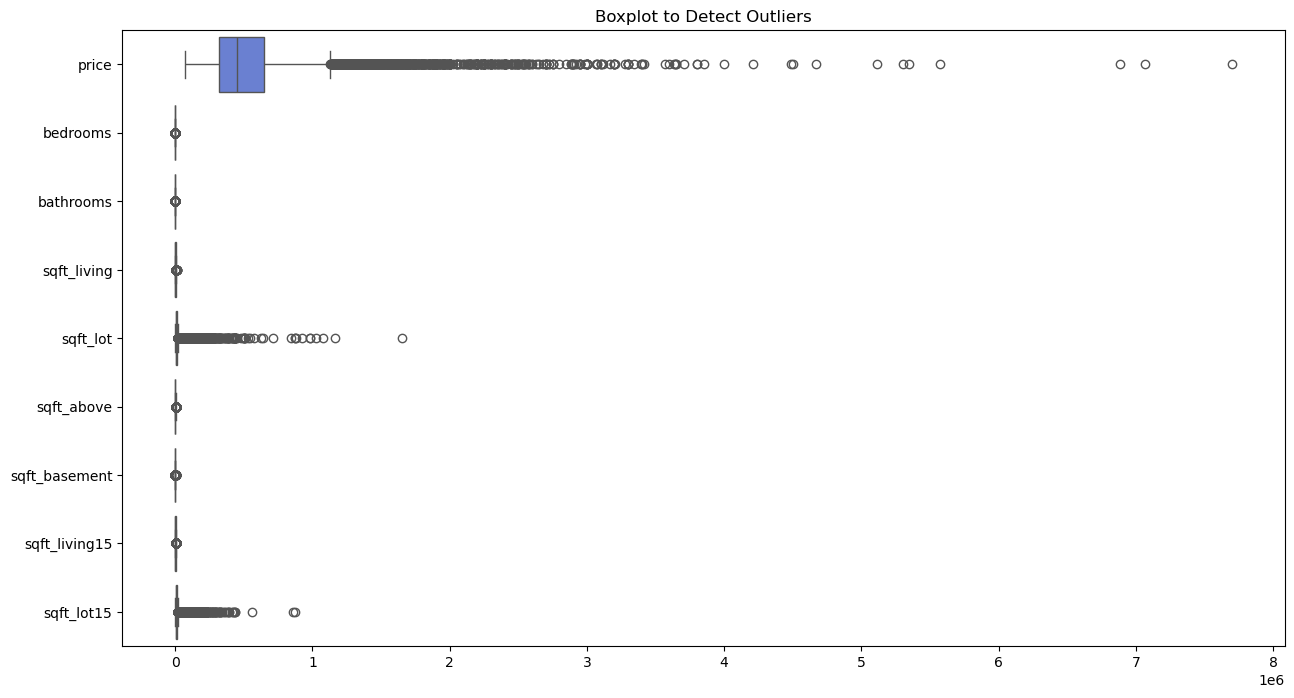

In [28]:
# Plot boxplots for numerical columns
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                  'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_cols], orient="h", palette="coolwarm")
plt.title("Boxplot to Detect Outliers")
plt.show()

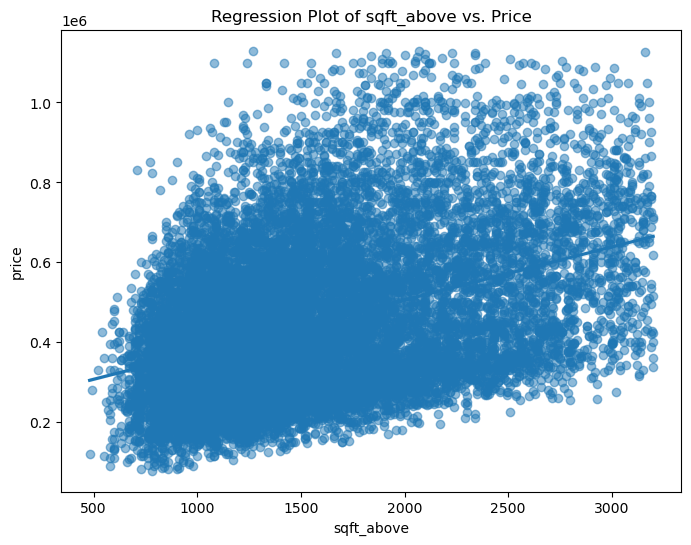

In [52]:
# Create a regression plot to analyze the correlation
plt.figure(figsize=(8, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha':0.5})

# Show the plot
plt.title('Regression Plot of sqft_above vs. Price')
plt.show()

In [30]:
# Helper function to remove outliers
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from numerical columns

df = remove_outliers(df, numerical_cols)

print(f"Dataset shape after outlier removal: {df.shape}")

Dataset shape after outlier removal: (16218, 14)


# Train-Test Split

In [33]:
# 5. Train-Test Split
X = df.drop(['price'], axis=1)  # Drop target variable
y = df['price']  # Use log-transformed price as target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (12974, 13), Testing set: (3244, 13)


# Transform Features

In [36]:
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [38]:
# Scale Features
numerical_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                  'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [40]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
20800,-0.311656,0.810188,-0.248153,-1.496713,3.0,0,0,3,8,0.159593,-0.676476,-0.277890,-1.700614
12997,-0.311656,1.570505,-0.114138,-1.229707,3.0,0,0,3,7,0.299892,-0.676476,-0.196031,-0.837492
17261,0.989316,1.190347,0.723462,1.017127,1.0,0,0,3,7,-0.278842,1.671464,-0.093708,1.164105
442,-1.612627,-1.470763,-0.633449,-0.485326,1.0,0,0,3,8,-0.857576,0.313619,1.256962,-0.485888
14412,0.989316,0.810188,2.164133,1.194509,2.0,0,0,5,8,1.509972,1.218849,0.888597,0.385707


# Model Training

In [43]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)

# Model Evaluation

In [46]:
# Exponentiate predictions to get original price scale
y_pred_original = np.expm1(y_pred)

# Exponentiate actual values (for evaluation)
y_test_original = np.expm1(y_test)

mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Linear Regressor (Exponentiate-transformed price) - MSE: {mse}, R²: {r2}")

Linear Regressor (Exponentiate-transformed price) - MSE: 19102374835.434475, R²: 0.4659964713500727


In [60]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Create a pipeline with scaling, polynomial transform, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('poly', PolynomialFeatures(degree=2)),  # Polynomial transform
    ('regressor', LinearRegression())  # Linear Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions using the test data
y_pred = pipeline.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f"R^2 score: {r2:.4f}")

R^2 score: 0.5210


In [62]:
from sklearn.linear_model import Ridge

# Create and fit a Ridge regression model with alpha=0.1 (regularization parameter)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R^2 score for Ridge regression
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R^2 score (Ridge Regression): {r2_ridge:.4f}")

R^2 score (Ridge Regression): 0.4741


In [64]:
# Perform a second-order polynomial transform on both training and testing data
poly_transform = PolynomialFeatures(degree=2)
X_train_poly = poly_transform.fit_transform(X_train)
X_test_poly = poly_transform.transform(X_test)

# Create and fit a Ridge regression model with alpha=0.1 on the transformed data
ridge_model_poly = Ridge(alpha=0.1)
ridge_model_poly.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_ridge_poly = ridge_model_poly.predict(X_test_poly)

# Calculate R^2 score for Ridge regression with polynomial features
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
print(f"R^2 score (Ridge Regression with Polynomial Features): {r2_ridge_poly:.4f}")


R^2 score (Ridge Regression with Polynomial Features): 0.5209
